#1.Ejemplo de una regresión lineal Múltiple
#Concrete Compressive Strength Data Set
Descripción: El concreto es el material más importante en la ingeniería civil. La resistencia a la compresión del concreto es una función altamente no lineal de la edad y los ingredientes.

Instancias: 1030

Atributos: 8

Output: Resistencia a la compresión en MPa 

1. Cemento 
2. Escoria de alto horno 
3. Cenizas volantes 
4. Agua
5. Superplastificante 
6. Agregado grueso
7. Agregado fino 
8. Edad 
9. Resistencia a la compresión del hormigón

Más: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

 

#2. Montando google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/6. Métodos de ML/6.1 Regresión lineal múltiple'
name = 'Concrete_data.csv'

#3. Importación de librerías 

In [ ]:
import numpy as ___
import matplotlib.pyplot as plt
import pandas as ___
import seaborn as ___
import os
path_file = os.path.join(___,___)

#4. Lectura y visualuzación del dataset

In [ ]:
dataset = pd.read_csv(path_file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.___(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
dataset.___()

In [ ]:
print ('Counts of Missing values')
print (dataset.isna().sum())

Counts of Missing values
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


Text(0, 0.5, 'Concrete compressive strength')

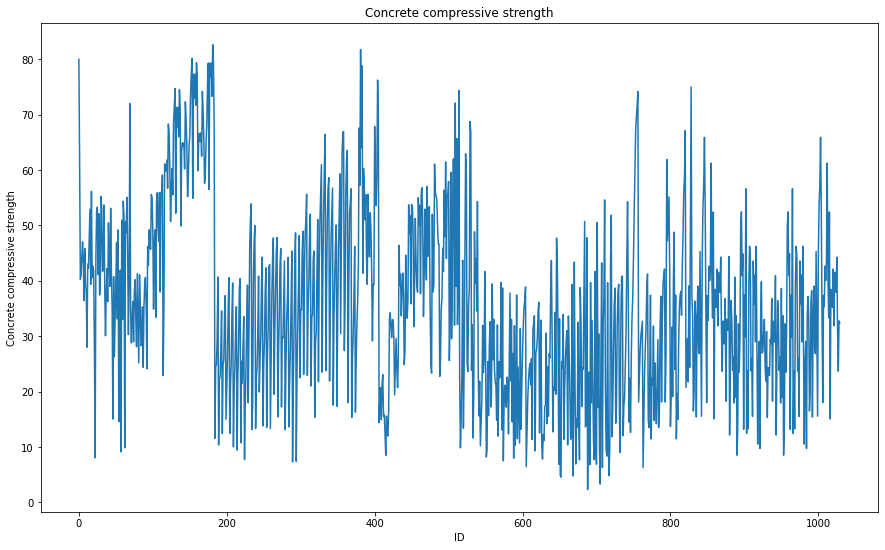

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(y)

plt.title('Concrete compressive strength')
plt.xlabel('ID')
plt.ylabel('Concrete compressive strength')


Distribución de las características y su relación con la variable objetivo.

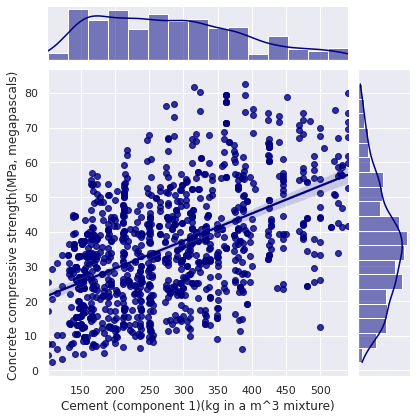

In [ ]:
cols = dataset.columns
sns.set(font_scale=1)
sns.jointplot(data=dataset, x=cols[0], y=cols[-1]
                  ,kind='reg',color=___)
plt.show()

Escalando

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = dataset.columns
sc = StandardScaler()
X = pd.DataFrame(columns=cols[:-1], data=sc.fit_transform(dataset.drop(cols[-1],axis=1)))
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


Visualización de la distribución de las características.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


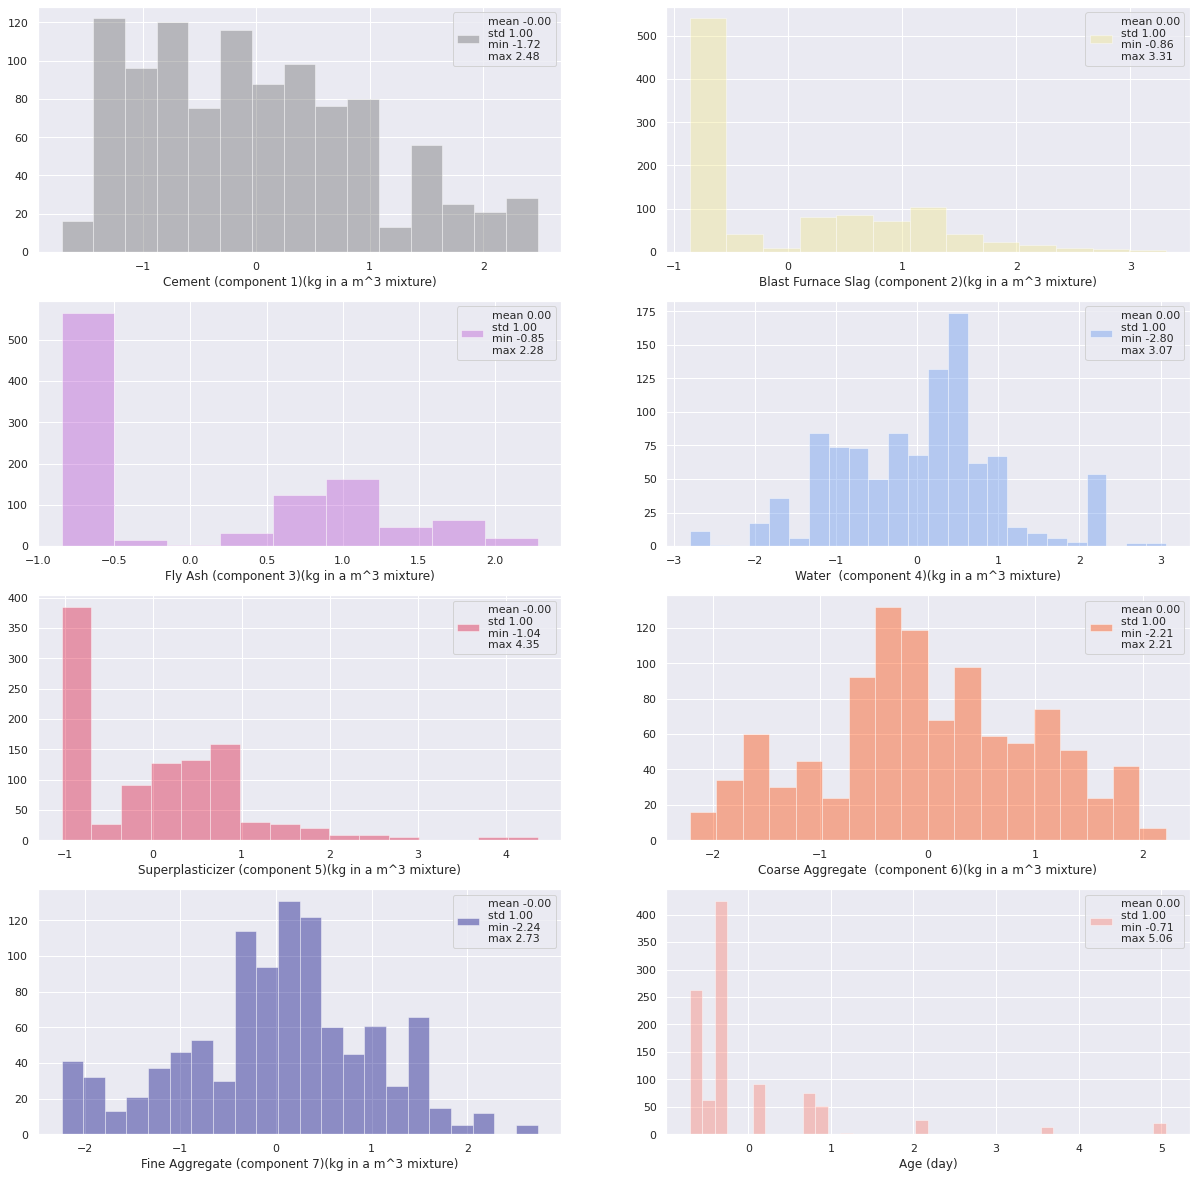

In [ ]:
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)
cols = X.columns
n_row = len(cols)
n_col = 2
n_sub = 1
fig = plt.figure(figsize=(10,20))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X[cols[i]],norm_hist=False,kde=False, color=color[i],
                 label=['mean '+str('{:.2f}'.format(X.iloc[:,i].mean()))
                        +'\n''std '+str('{:.2f}'.format(X.iloc[:,i].std()))
                        +'\n''min '+str('{:.2f}'.format(X.iloc[:,i].min()))
                        +'\n''max '+str('{:.2f}'.format(X.iloc[:,i].max()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

#5.Diviendo el dataset en conjunto para entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ___, random_state = ___)

print(f'Dimension de los datos de entrenamiento {X_train.shape}')
print(f'Dimension de los datos de prueba {X_test.shape}')

Dimension de los datos de entrenamiento (824, 8)
Dimension de los datos de prueba (206, 8)


#6. Creación y entrenamiento de un modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(___,  ___)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('El training score con LinearRegression es: ', regressor.score(X_train, y_train))


El training score con LinearRegression es:  0.6105238047649741


Probando otro modelo



In [ ]:
from xgboost import XGBRegressor #Extreme Gradient Boosting Regressor 
xgbregressor = XGBRegressor()
xgbregressor.fit(___,___)


[00:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('El training score con XGBRegressor es: ', xgbregressor.score(X_train,y_train) )


El training score con XGBRegressor es:  0.9464639534668634


#7. Prediciendo valores con el conjunto de prueba

In [ ]:
y_pred = xgbregressor.predict(___)

In [ ]:
print('El testing score con XGBRegressor es: ', xgbregressor.score(X_test, y_test) )


El testing score con XGBRegressor es:  0.886472829267589


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print ('Mean Absolute Error (MAE): ',mean_absolute_error(___, y_pred))
print ('R2, coficiente de determinación: ',r2_score(y_test, ___))

Mean Absolute Error (MAE):  4.042146082479976
R2, coficiente de determinación:  0.886472829267589


# 8.  Visualizando los valores esperados y los predichos

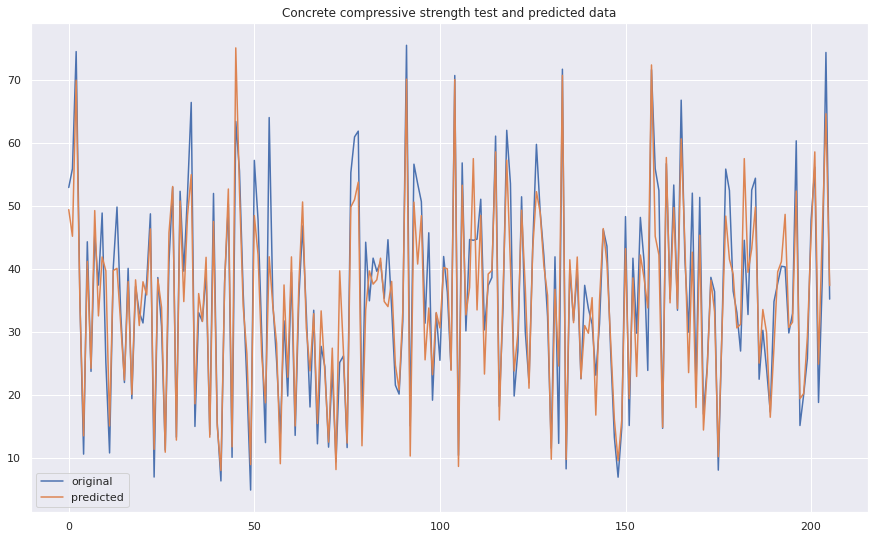

In [ ]:
plt.figure(figsize=(15, 9))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Concrete compressive strength test and predicted data")
plt.legend()
plt.show()

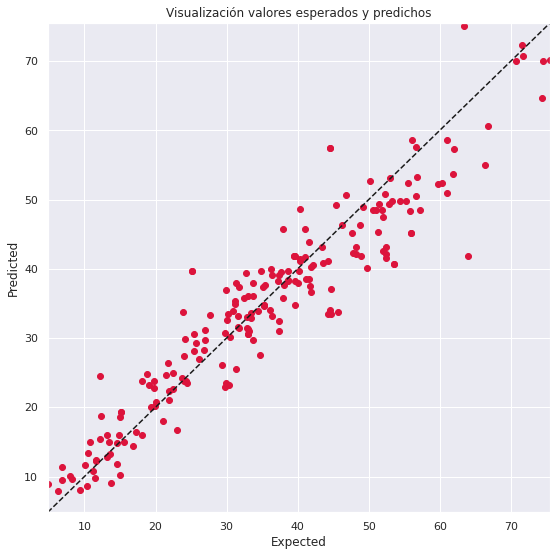

In [ ]:
predicted = y_pred
expected = y_test

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = plt.scatter(data=df, x='Expected', y='Predicted', color='crimson')
plt.title('Visualización valores esperados y predichos')
plt.xlabel('Expected')
plt.ylabel('Predicted')
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
plt.xlim(start, end)
plt.ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')